In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
resto = pd.read_csv("resto.csv")

In [3]:
resto

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [4]:
resto.describe()

,Unnamed: 0,order_id,quantity
count,4622.000000,4622.000000,4622.000000
mean,2310.500000,927.254868,1.075725
std,1334.400802,528.890796,0.410186
min,0.000000,1.000000,1.000000
25%,1155.250000,477.250000,1.000000
50%,2310.500000,926.000000,1.000000
75%,3465.750000,1393.000000,1.000000
max,4621.000000,1834.000000,15.000000


In [8]:
list(resto)

['Unnamed: 0',
 'order_id',
 'quantity',
 'item_name',
 'choice_description',
 'item_price']

In [9]:
resto.item_name.describe()

count             4622
unique              50
top       Chicken Bowl
freq               726
Name: item_name, dtype: object

# Le plat le plus commandé est: "Chicken Bowl", commandé 726 fois.

# Il y a 50 plats disponible au menu du restaurant. (catégorie unique) 

# Au total, le restaurant a reçu 4622 commandes enregistrés dans ce fichier

In [21]:
#Enlève tous les caractères dans les chaines de caractères d'une series"
resto['item_price'] = resto['item_price'].str.replace('$', '', regex=True)

In [22]:
resto

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,1,Izze,[Clementine],3.39
2,2,1,1,Nantucket Nectar,[Apple],3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [23]:
resto['item_price'] = resto['item_price'].astype(float)

In [26]:
ca = resto.item_price.sum()
ca

34500.16

In [178]:
print(f"Le restaurant a réalisé un Chiffre d'affaire de {ca} dollars pour l'ensemble de ces commandes enregistrés")

Le restaurant a réalisé un Chiffre d'affaire de 34500.16 dollars pour l'ensemble de ces commandes enregistrés


# Le restaurant a réalisé un Chiffre d'affaire de 34500.16 dollars pour l'ensemble de ces commandes enregistrés

In [30]:
resto.item_price.describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

In [73]:
prix_moyen = resto.item_price.mean()
prix_moyen


7.464335785374397

In [36]:
print(f"Le prix moyen d'une commande est de {round(prix_moyen, 2)} dollars")

Le prix moyen d'une commande est de 7.46 dollars


# Le prix moyen d'une commande est de 7.46 dollars


# Chiffre d'affaire par plat ci-dessous

In [149]:
#Chiffre d'affaire par plat
ca_par_plat = resto.groupby('item_name', axis=0, sort=True).item_price.sum()

#Quel type d'objet Python ?
print(type(ca_par_plat))

#Triés croissants
ca_par_plat = ca_par_plat.sort_values(ascending=True)
ca_par_plat

<class 'pandas.core.series.Series'>


item_name
Chips and Mild Fresh Tomato Salsa           3.00
Veggie Crispy Tacos                         8.49
Carnitas Salad                              8.99
Crispy Tacos                               14.80
Salad                                      14.80
Bowl                                       29.60
Steak Salad                                35.66
Chips and Roasted Chili-Corn Salsa         43.02
Burrito                                    44.40
Veggie Salad                               50.94
Chips and Tomatillo-Red Chili Salsa        59.75
Carnitas Salad Bowl                        66.34
Izze                                       67.80
Chips and Roasted Chili Corn Salsa         67.85
Veggie Soft Tacos                          73.96
Carnitas Crispy Tacos                      77.96
Chips and Tomatillo-Green Chili Salsa      78.87
Chicken Salad                              81.09
Nantucket Nectar                           98.31
Barbacoa Salad Bowl                       106.40
Barbacoa C

In [150]:
#Echantillon des ventes par plat.

echantillon_ventes = ca_par_plat.sample(10)

echantillon_ventes.sort_values(ascending=True)

item_name
Crispy Tacos                      14.80
Salad                             14.80
Bowl                              29.60
Veggie Salad                      50.94
Nantucket Nectar                  98.31
Side of Chips                    185.90
Chips and Fresh Tomato Salsa     361.36
Barbacoa Bowl                    672.36
Chicken Soft Tacos              1108.09
Chips and Guacamole             2201.04
Name: item_price, dtype: float64

# Selection des meilleures ventes

In [169]:
meilleures_ventes = ca_par_plat[-5::]
meilleures_ventes

item_name
Chips and Guacamole    2201.04
Steak Bowl             2260.19
Steak Burrito          3851.43
Chicken Burrito        5575.82
Chicken Bowl           7342.73
Name: item_price, dtype: float64

<AxesSubplot:xlabel='item_name'>

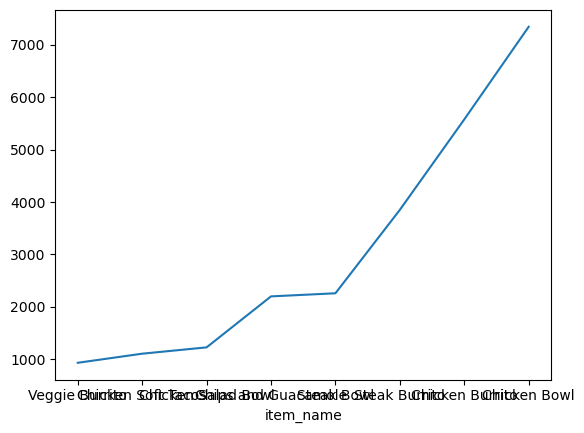

In [168]:
type(meilleures_ventes)

meilleures_ventes.plot()